# PC assemble production line simulation (human edition)

## Initialization

Import the required libraries.

In [69]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *
import random
import statistics
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

np.random.seed(7)

Initialize the state object

In [70]:
pcs = State(left = 0)
time = State(elapsed = 0)

,values
elapsed,0


Initialize the TimeSeries objects

In [71]:
assembled_pcs = TimeSeries()

,values


## Declaration

Declare the `assemble_pcs` function.

In [78]:
def assemble_pcs(employees):
    total_time = 0
    for i in range(employees):
        total_time += random.randint(1800, 2900)
    average_time = total_time / employees
    return average_time

Declare the `draw` function.

In [79]:
def draw():
    plot(assembled_pcs, color='blue', label='Assembled pcs')

    decorate(title='Assembled pcs by persons per day',
            xlabel='Time step (work days)', 
            ylabel='Number of pcs')

    savefig('figs/chap02-fig01.pdf')

Declare the `run_simulation` function.

In [80]:
def run_simulation(employees, pc_quantity):
    pcs.left = pc_quantity
    
    time_limit = 7 * 60 * 60 # work day time in seconds

    day = 1
    while True:
        assemble_time = assemble_pcs(employees)
        time.elapsed += assemble_time
        pcs.left -= employees

        if (time.elapsed >= time_limit):
            assembled_pcs[day] = pc_quantity - pcs.left
            time.elapsed = 0
            print("Day " + str(day) + ": " + str(pc_quantity - pcs.left))
            day += 1
        if (pcs.left <= 0):
            break
    draw()

# Run simulation

- Employees: 
- Pc_quantity:

Day 1: 200
Day 2: 420
Day 3: 640
Day 4: 860
Day 5: 1080
Day 6: 1300
Saving figure to file figs/chap02-fig01.pdf


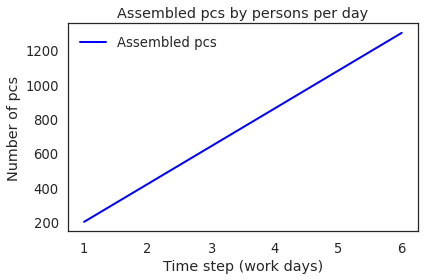

In [77]:
run_simulation(20, 1500)

# PC assemble production line simulation (machine edition)

## Initialization

Import the required libraries.

In [32]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *
import random
import statistics
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

np.random.seed(7)

Initialize the state object

In [82]:
pcs = State(left = 0)
time = State(elapsed = 0)

,values
elapsed,0


Initialize the TimeSeries objects

In [83]:
assembled_pcs = TimeSeries()

,values


## Declaration

Declare the `assemble_pcs` function.

In [84]:
def assemble_pcs():
    time = random.randint(300, 400)
    return time

Declare the `draw` function.

In [85]:
def draw():
    plot(assembled_pcs, color='blue', label='Assembled pcs')

    decorate(title='Assembled pcs by persons per day',
            xlabel='Time step (work days)', 
            ylabel='Number of pcs')

    savefig('figs/chap02-fig01.pdf')

Declare the `run_simulation` function.

In [86]:
def run_simulation(pc_quantity):
    pcs.left = pc_quantity
    
    time_limit = 8 * 60 * 60 # work day time in seconds

    day = 1
    while True:
        assemble_time = assemble_pcs()
        time.elapsed += assemble_time
        pcs.left -= 1

        if (time.elapsed >= time_limit):
            assembled_pcs[day] = pc_quantity - pcs.left
            time.elapsed = 0
            print("Day " + str(day) + ": " + str(pc_quantity - pcs.left))
            day += 1
            
        if (pcs.left <= 0):
            break
    draw()

# Run simulation

- Pc_quantity:

Day 1: 83
Day 2: 165
Day 3: 247
Day 4: 330
Day 5: 413
Day 6: 496
Day 7: 580
Day 8: 663
Day 9: 746
Day 10: 828
Day 11: 911
Day 12: 993
Day 13: 1075
Day 14: 1157
Day 15: 1240
Day 16: 1322
Day 17: 1405
Day 18: 1488
Saving figure to file figs/chap02-fig01.pdf


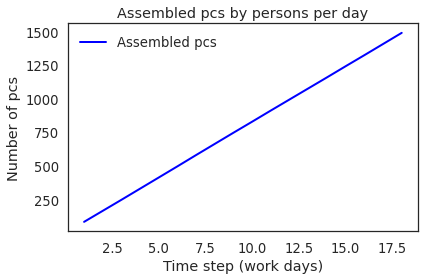

In [87]:
run_simulation(1500)